# **Complete Guide on Time Series Analysis in Python**


This notebook is focused on Time Series Analysis, which involves analyzing data points recorded at different time intervals. The goal is to apply statistical tools and techniques to examine and understand the time series data. Let's begin our exploration.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Time Series Analysis](#1)
2.	[Types of data](#2)
3.	[Time Series terminology](#3)
4.	[Time Series Analysis](#4)
5.	[Visualize the Time Series](#5)
6.	[Patterns in a Time Series](#6)
7.	[Additive and Multiplicative Time Series](#7)
8.	[Decomposition of a Time Series](#8)
9.	[Stationary and Non-Stationary Time Series](#9)
10.	[How to make a time series stationary](#10)
11.	[How to test for stationarity](#11)
    - 11.1	[Augmented Dickey Fuller test (ADF Test)](#11.1)
    - 11.2	[Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)](#11.2)
    - 11.3	[Philips Perron test (PP Test)](#11.3)
12.	[Difference between white noise and a stationary series](#12)
13.	[Detrend a Time Series](#13)
14.	[Deseasonalize a Time Series](#14)
15.	[How to test for seasonality of a time series](#15)
16.	[Autocorrelation and Partial Autocorrelation Functions](#16)
17.	[Computation of Partial Autocorrelation Function](#17)
18.	[Lag Plots](#18)
19.	[Granger Causality Test](#19)
20.	[Smoothening a Time Series](#20)
21.	[References](#21)


# **1. Introduction to Time-Series Analysis** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)


 A `time series` refers to a series of data points recorded at regular intervals, like hourly, daily, weekly, monthly, or yearly. The main goal of time series analysis is to use statistical tools and techniques to gain insights from the data.

Let's dive in and explore the key concepts:

- **Time-Series Forecasting**: This means using statistical models to predict future values based on patterns we observe in the past data.

- **Time Series Analysis**: It involves using statistical methods to study time series data. We want to find meaningful information, patterns, and other interesting characteristics in the data. Line charts are commonly used to visualize time series. The ultimate aim is to understand the data better so that we can make accurate predictions.

Time series analysis has various applications in statistics, finance, and business. For example, we can analyze the daily closing values of stock indices like NASDAQ or Dow Jones. Other common applications include sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition, and earthquake prediction.

**Components of a Time Series**:

- **Trend**: The trend shows the overall direction of the time series data over a long period. It can go up (increase), down (decrease), or remain stable (not change much).

- **Seasonality**: Seasonality refers to repeating patterns in the data that occur at regular intervals. For instance, water consumption may increase during summer due to hot weather.

- **Cyclical Component**: This component represents trends that don't repeat at fixed intervals. It refers to ups and downs observed in a time series, often associated with business cycles. Cyclical patterns can last from 3 to 12 years, depending on the nature of the data.

- **Irregular Variation**: This refers to unpredictable fluctuations in the data that don't follow a specific pattern. These variations are random and can't be easily explained.

- **ETS Decomposition**: ETS decomposition is a technique used to separate different components of a time series. It helps us understand the Error, Trend, and Seasonality components.

In this notebook, we will explore and analyze the sales of video games over time. By applying time series analysis, we can gain valuable insights into this data and make informed predictions.

Get ready to embark on this exciting journey of understanding and unraveling time series analysis together!!



# **2. Types of data** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


As mentioned earlier, `time series analysis` involves analyzing data collected at different points in time. There are three types of data we consider:

1. **Time series data**: This refers to observations of a variable recorded at different time points. For example, tracking the monthly sales of a product over a year would be time series data.

2. **Cross-sectional data**: This type of data involves recording one or more variables at the same time. For instance, collecting data on the income and age of individuals in a particular year is cross-sectional data.

3. **Pooled data**: Pooled data is a combination of time series and cross-sectional data. It involves looking at both the variable values recorded at different time points and those recorded simultaneously.

In summary, time series analysis focuses on studying how variables change over time, cross-sectional data looks at variables at a specific point in time, and pooled data combines both types to gain a comprehensive understanding.


# **3. Time Series terminology** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


In time series analysis, there are several important terms and concepts to understand:

1. **Dependence**: This refers to the relationship between two observations of the same variable at different time periods.

2. **Stationarity**: A time series is considered stationary when its mean value remains constant over time. If the values increase without bound due to cumulative effects, stationarity is not met.

3. **Differencing**: Differencing is a technique used to make a time series stationary and control auto-correlations. However, it's important to avoid over-differencing, as it can lead to incorrect estimates.

4. **Specification**: This involves testing the linear or non-linear relationships of dependent variables using time series models like ARIMA.

5. **Exponential Smoothing**: Exponential smoothing predicts the next period's value based on past and current values. It involves averaging data to cancel out non-systematic components. Exponential smoothing is commonly used for short-term predictions.

6. **Curve fitting**: Curve fitting regression is employed in time series analysis when data follows a non-linear relationship.

7. **ARIMA**: ARIMA stands for AutoRegressive Integrated Moving Average. It's a popular time series model used for forecasting and analyzing time-dependent data.

These concepts are crucial in understanding and analyzing time series data effectively.


# **4. Time Series Analysis** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


## **4.1 Basic set up** <a class="anchor" id="4.1"></a>

[Table of Contents](#0.1)

In [1]:
# data processing
import numpy as np 
import pandas as pd 

# data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns             


## **4.2 Import data** <a class="anchor" id="4.2"></a>

[Table of Contents](#0.1)

In [2]:
## Download dataset 
import urllib.request

url = "https://github.com/selva86/datasets/raw/master/AirPassengers.csv"
file_name = "AirPassengers.csv"

# Download the file
urllib.request.urlretrieve(url, file_name)

print("Data downloaded successfully!")


Data downloaded successfully!


In [3]:
path = '/content/AirPassengers.csv'  ## dataset path 

df = pd.read_csv(path)  ## read dataset 
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df.columns = ['Date','Number of Passengers'] ## rename column  

df.head()

,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# **5. Visualize the Time Series** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)


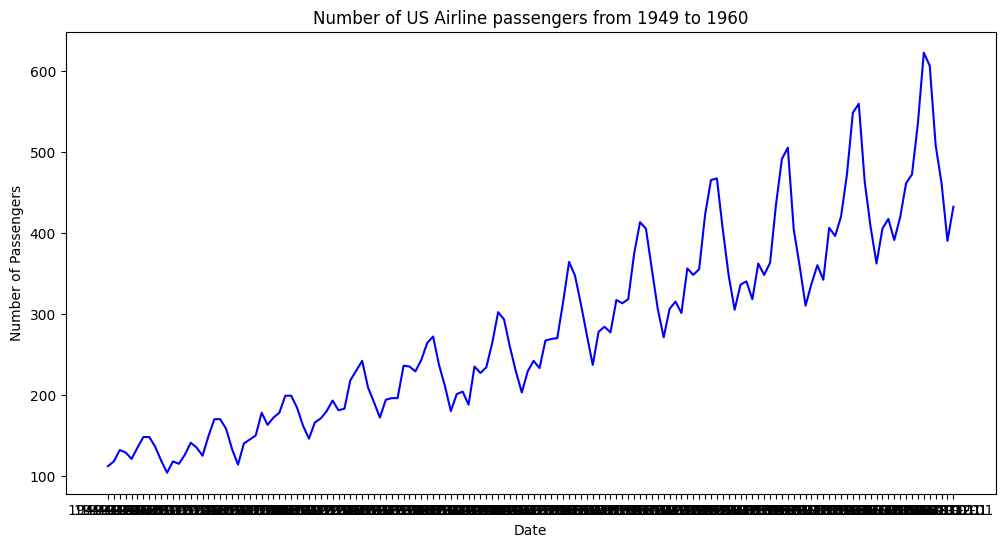

In [5]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    """
    Plots a line chart for a given DataFrame with specified x and y values.

    Args:
        df (DataFrame): The DataFrame containing the data.
        x (Series): The data for the x-axis.
        y (Series): The data for the y-axis.
        title (str, optional): The title of the plot. Defaults to "".
        xlabel (str, optional): The label for the x-axis. Defaults to 'Date'.
        ylabel (str, optional): The label for the y-axis. Defaults to 'Number of Passengers'.
    """
    plt.figure(figsize=(12, 6), dpi=dpi) 
    plt.plot(x, y, color='blue')  
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'],
         title='Number of US Airline passengers from 1949 to 1960')


- Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

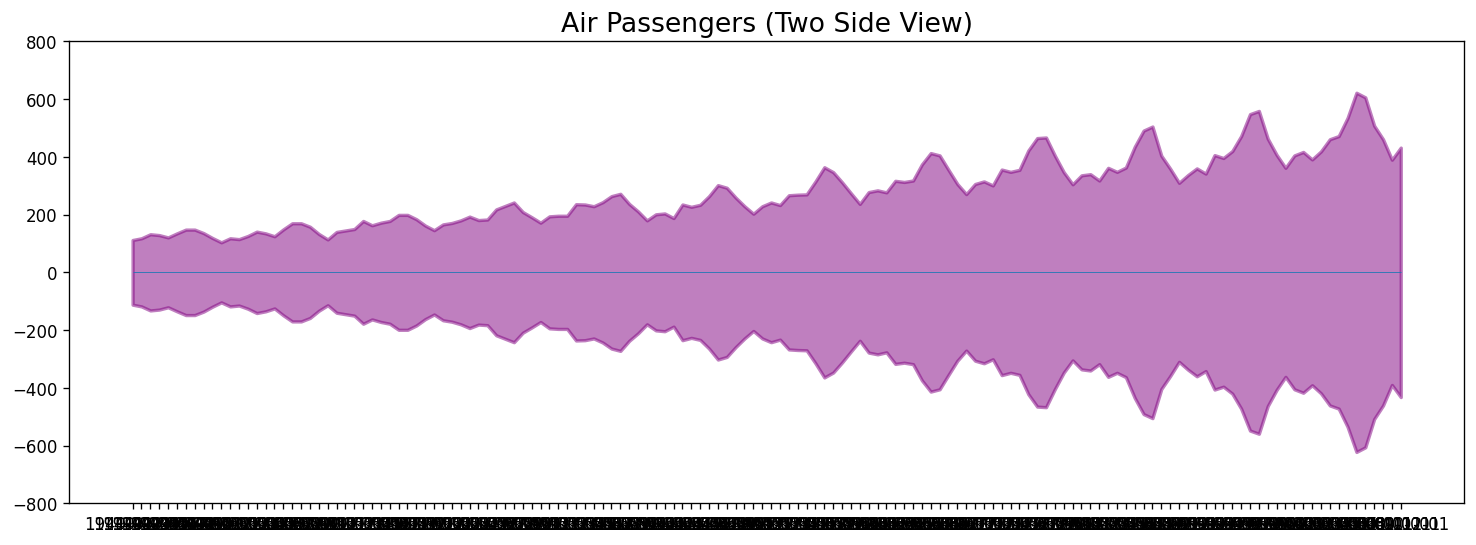

In [6]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='purple') 
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

- It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

# **6. Patterns in a Time Series** <a class="anchor" id="6"></a>


[Table of Contents](#0.1)


- Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.


### **Trend**

- A **trend** is observed when there is an increasing or decreasing slope observed in the time series. 


### **Seasonality**

- A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.


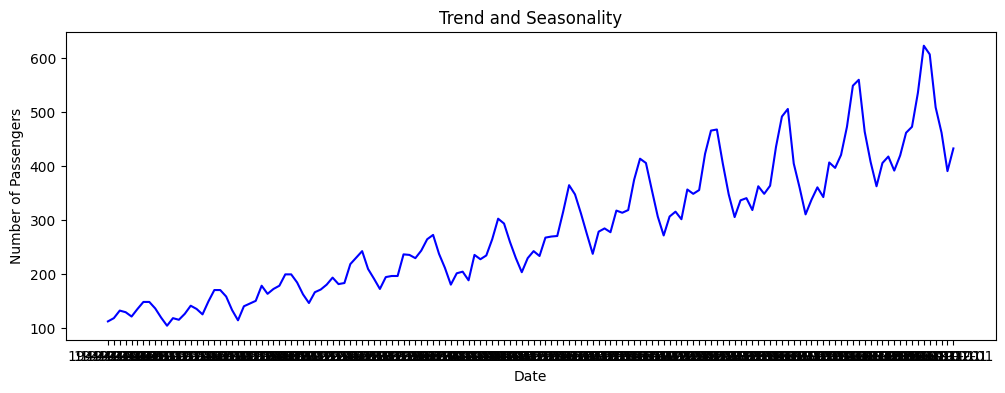

In [7]:

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    """
    Plots a line chart for the given DataFrame with specified x and y values.

    Args:
        df (DataFrame): The DataFrame containing the data.
        x (array-like): The data for the x-axis.
        y (array-like): The data for the y-axis.
        title (str, optional): The title of the plot. Defaults to "".
        xlabel (str, optional): The label for the x-axis. Defaults to 'Date'.
        ylabel (str, optional): The label for the y-axis. Defaults to 'Number of Passengers'.
    """
    plt.figure(figsize=(12, 4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')


## Cyclic Behavior

- Cyclic behavior refers to the rise and fall patterns in a series that do not follow fixed calendar-based intervals. It is important to differentiate cyclic effects from seasonal effects.

- Cyclic effects are influenced by various factors, such as business and socio-economic conditions, rather than fixed calendar patterns.


# **7. Additive and Multiplicative Time Series** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)


- Depending on the nature of trends and seasonality, a time series can be modeled as either additive or multiplicative. Each observation in the series can be expressed as a sum or a product of the components.

### Additive Time Series:

Value = Base Level + Trend + Seasonality + Error

### Multiplicative Time Series:

Value = Base Level x Trend x Seasonality x Error


# **8. Decomposition of a Time Series** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)


- Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.


- The seasonal_decompose in statsmodels implements this conveniently.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

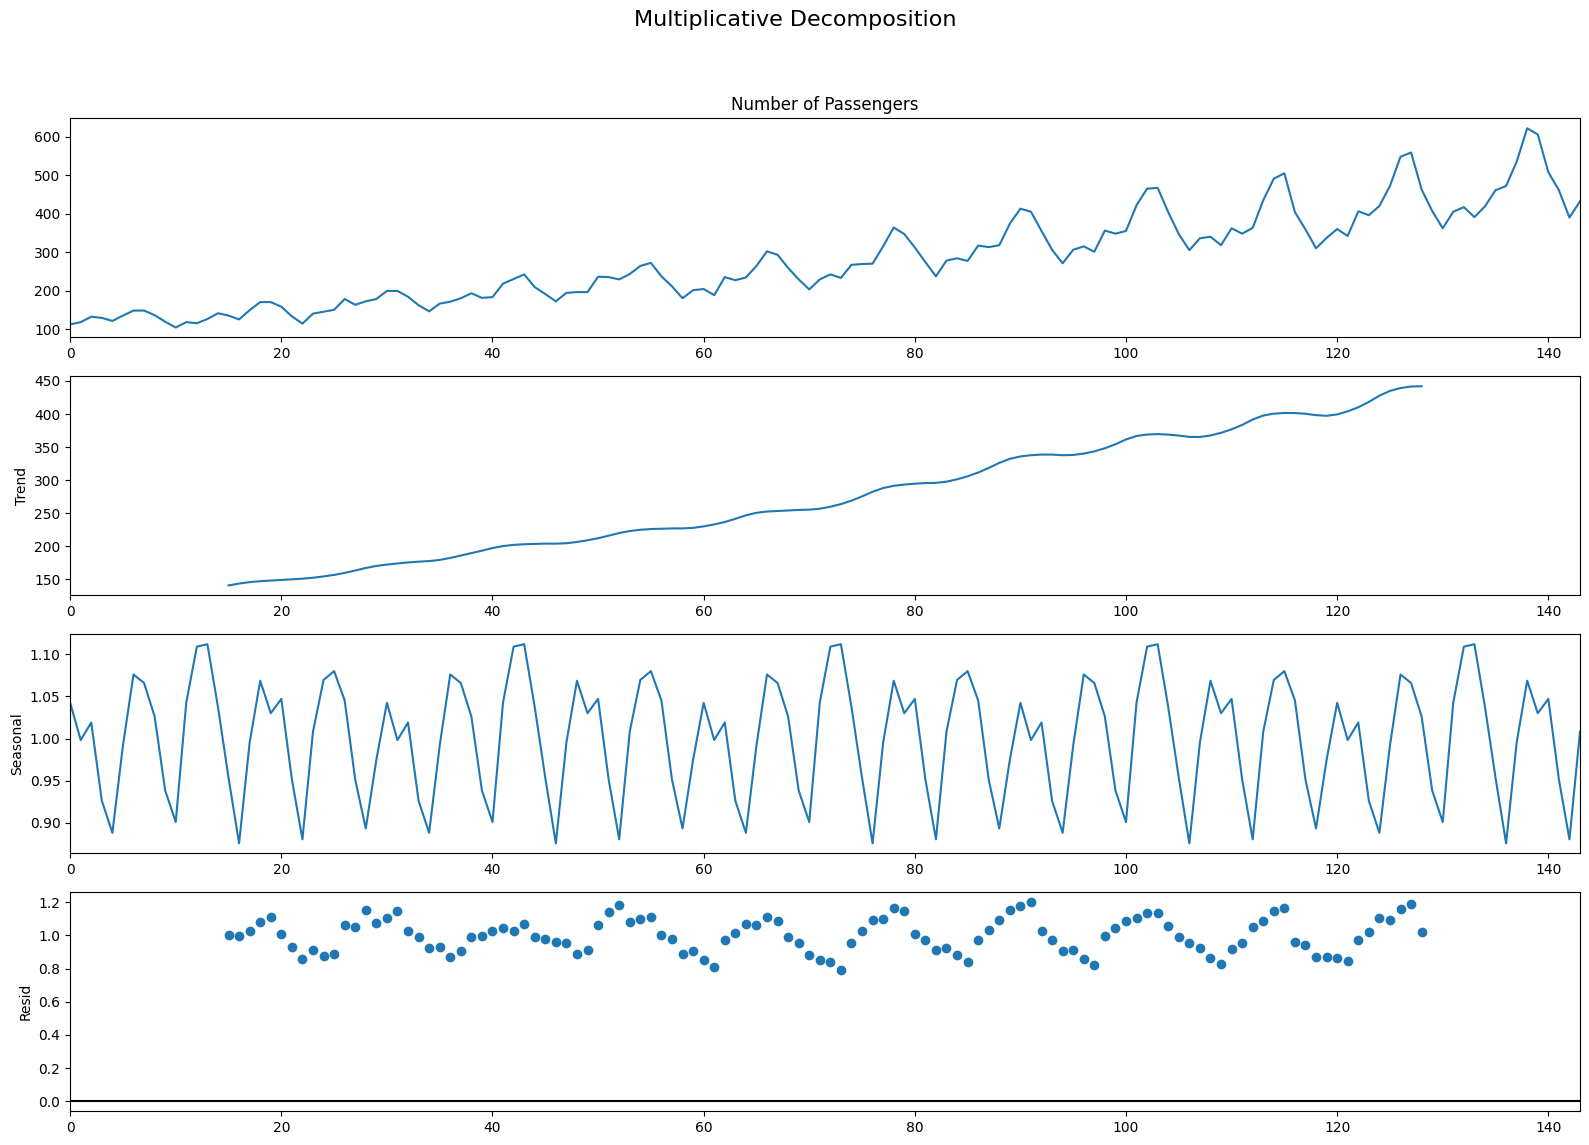

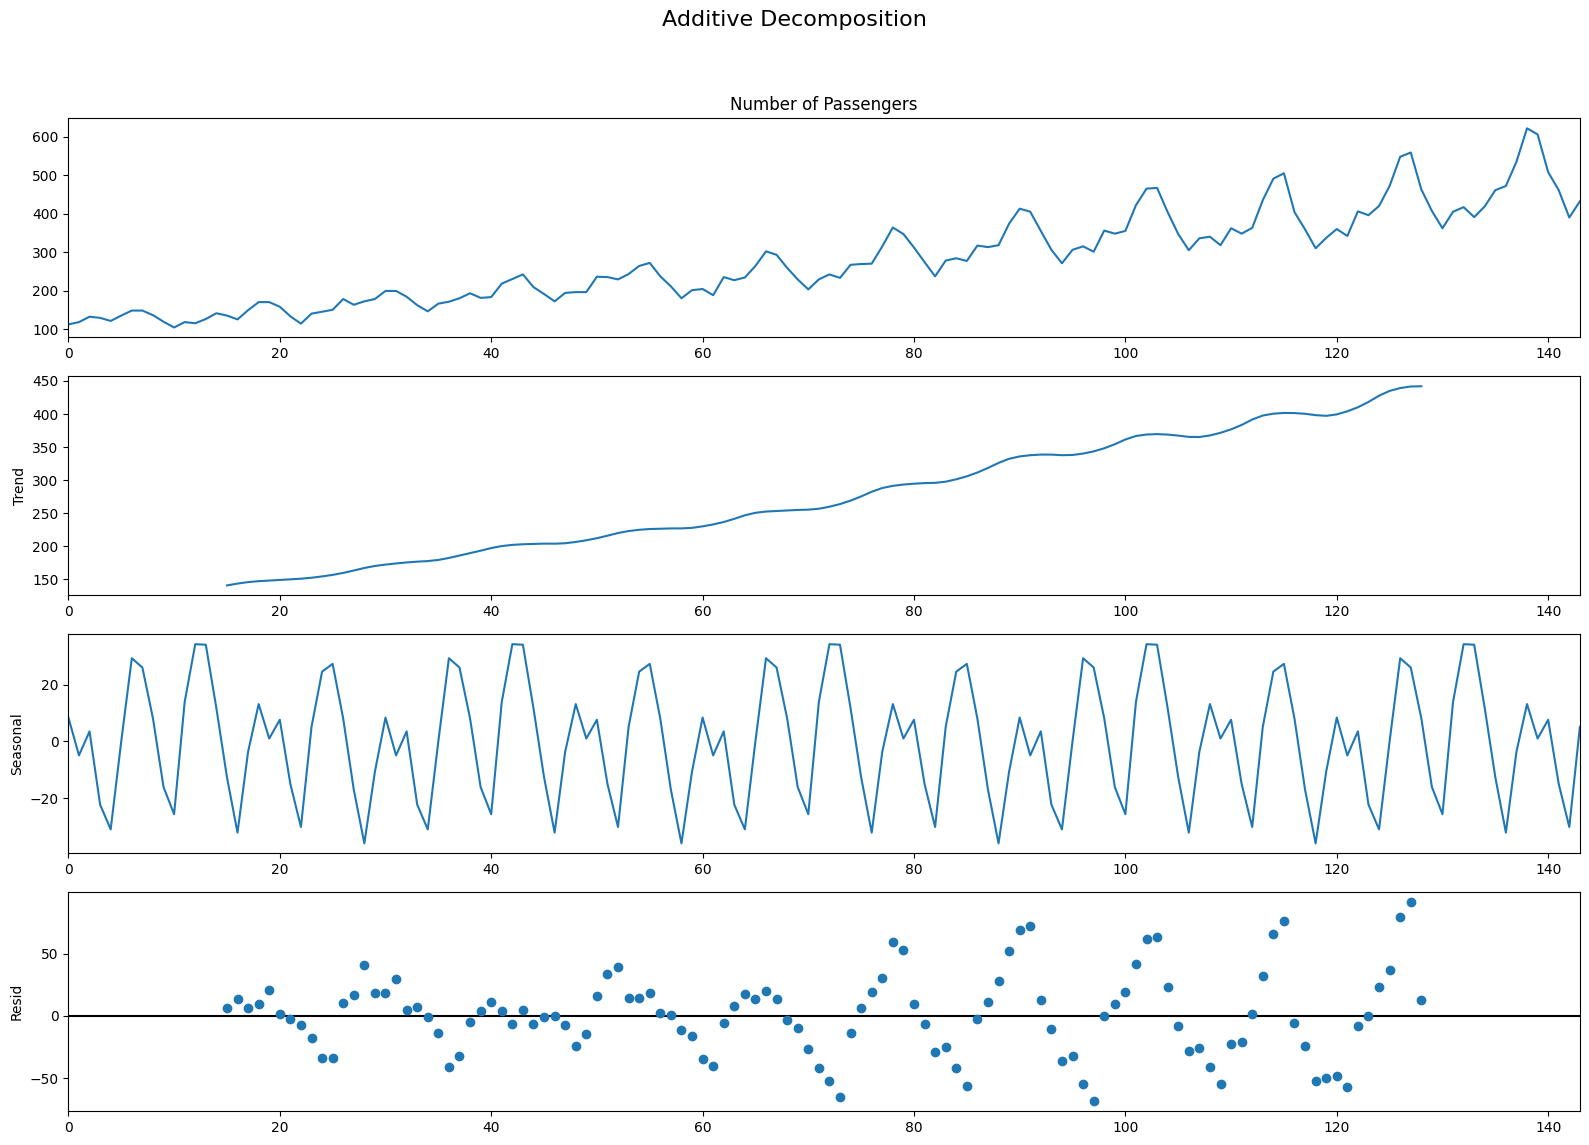

In [9]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

- Upon closer examination of the residuals in the additive decomposition, we can observe some remaining patterns or structure.

- On the other hand, the multiplicative decomposition appears to be more random, which is desirable. Therefore, for this specific series, the multiplicative decomposition is preferred.

# **9. Stationary and Non-Stationary Time Series** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)

- `Stationarity` is an important concept in time series analysis. A stationary time series is one where the values of the series are not dependent on time. In other words, the series does not exhibit any specific trend or pattern that changes over time.

- When a time series is `stationary`, its statistical properties such as mean, variance, and autocorrelation remain constant over time. **Autocorrelation** measures the correlation between the series and its previous values, indicating how much the series is influenced by its own past.

- a `stationary` time series is not affected by seasonal effects. This means that any seasonal patterns or fluctuations do not significantly impact the overall behavior of the series.

- To provide a clearer understanding of stationary and non-stationary time series, we will plot some examples. By visually examining these examples, we can observe the presence or absence of trends, patterns, and seasonality, helping us distinguish between stationary and non-stationary time series.

![Stationary and Non-Stationary Time Series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1

- We can convert any non-stationary time series into a stationary one by applying a suitable transformation. Most statistical forecasting methods are designed to work with stationary time series. Therefore, the first step in the forecasting process is usually to transform a non-stationary series into a stationary one.



# **10. How to make a time series stationary?** <a class="anchor" id="10"></a>


[Table of Contents](#0.1)


#### To make a time series stationary, we can apply various transformations, including:

1. Differencing the series (once or multiple times)
2. Taking the logarithm of the series
3. Taking the nth root of the series
4. Using a combination of the above transformations

- Among these methods, differencing the series is the most commonly used and convenient approach to achieve stationarity. By differencing the series at least once, we can transform it into an approximately stationary form.

## **10.1 Introduction to Differencing** <a class="anchor" id="10.1"></a>


[Table of Contents](#0.1)

- Differencing the series involves subtracting the current value from the next value. If Y_t represents the value at time t, then the first difference of Y is calculated as Yt - Yt-1.

- If the first difference does not result in a stationary series, we can proceed to the second difference, and so on.

For example, let's consider the series [1, 5, 2, 12, 20]:

- First differencing yields: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

- Second differencing yields: [-3-4, -10-3, 8-10] = [-7, -13, -2]

By iteratively differencing the series, we can potentially achieve stationarity, which is desirable for many time series analysis techniques.

## **10.2 Reasons to convert a non-stationary series into stationary one before forecasting** <a class="anchor" id="10.2"></a>


[Table of Contents](#0.1)

There are several reasons why we aim to convert a non-stationary series into a stationary one. These reasons are as follows:

- Forecasting a stationary series is comparatively easier and the resulting forecasts tend to be more reliable.

- Autoregressive forecasting models, which use lagged values of the series as predictors, are essentially linear regression models. For accurate results, it is preferred that the predictors (lagged values) are not correlated with each other.

- Stationarizing the series helps to eliminate persistent autocorrelation, making the predictors (lags of the series) in forecasting models nearly independent. This improves the effectiveness of linear regression models and enhances the accuracy of forecasts.

# **11. How to test for stationarity?** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)


- The stationarity of a series can be assessed by visually examining its plot. If the plot exhibits a clear trend or seasonality, it is likely non-stationary.

- Another approach is to divide the series into two or more contiguous parts and calculate summary statistics such as mean, variance, and autocorrelation. If these statistics vary significantly between the parts, the series is unlikely to be stationary.

- There are quantitative methods available to determine the stationarity of a series. These methods involve conducting statistical tests known as `Unit Root` Tests. These tests check for the presence of a unit root, which indicates non-stationarity, in a time series.

- Some commonly used Unit Root tests include:

  1. Augmented Dickey-Fuller test (ADF Test)
  2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test (for trend stationary)
  3. Philips Perron test (PP Test)

These tests provide statistical evidence to determine whether a series is stationary or non-stationary.




## **11.1 Augmented Dickey Fuller test (ADF Test)** <a class="anchor" id="11.1"></a>


[Table of Contents](#0.1)


- The **Augmented Dickey-Fuller test (ADF Test)** is a widely used test to determine stationarity in a time series. It operates under the assumption that the null hypothesis is that the time series has a unit root and is therefore non-stationary. The test collects evidence to either support or reject this null hypothesis. If the calculated p-value from the ADF test is less than a predetermined significance level (typically 0.05), we reject the null hypothesis, indicating that the series is stationary.


- Feel free to check the following links to learn more about the ADF Test.


https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

https://machinelearningmastery.com/time-series-data-stationary-python/

http://www.insightsbot.com/augmented-dickey-fuller-test-in-python/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html

https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/




## **11.2 Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)** <a class="anchor" id="11.2"></a>


[Table of Contents](#0.1)


- The **KPSS test** (Kwiatkowski-Phillips-Schmidt-Shin test) is a test used to assess trend stationarity in a time series. In contrast to the ADF test, the KPSS test has the opposite null hypothesis. It assumes that the time series is trend stationary, meaning it contains a deterministic trend. The interpretation of the p-value in the KPSS test is the opposite of the ADF test. If the p-value is less than the significance level (typically 0.05), we reject the null hypothesis, indicating the presence of a unit root and non-stationarity in the series.

- Interested readers can learn more about the KPSS test from the below links:


https://en.wikipedia.org/wiki/KPSS_test

https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

https://www.statisticshowto.com/kpss-test/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-kpss.html



## **11.3 Philips Perron test (PP Test)** <a class="anchor" id="11.3"></a>


[Table of Contents](#0.1)

- The **Phillips Perron test** (PP test) is another [unit root test](https://en.wikipedia.org/wiki/Unit_root) used in [time series analysis](https://en.wikipedia.org/wiki/Time_series). It is specifically designed to test the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) that a time series is integrated of order 1, meaning it has a unit root. The PP test is similar to the ADF test but provides some modifications to address certain issues. It is a popular choice for testing stationarity in time series data. By examining the p-value obtained from the PP test, we can determine whether to reject or fail to reject the null hypothesis of unit root presence in the series.



- For more information on PP test, please visit the following links:


https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test

https://www.mathworks.com/help/econ/pptest.html

https://people.bath.ac.uk/hssjrh/Phillips%20Perron.pdf

https://www.stata.com/manuals13/tspperron.pdf

# **12. Difference between white noise and a stationary series** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)

- White noise is a type of time series where the values are completely random and not dependent on time. It exhibits no pattern or correlation between the values, making it unpredictable.
- White noise has a constant mean of zero and a constant variance. Its statistical properties do not change over time, providing a baseline of randomness against which other patterns or trends in a time series can be compared.

<Axes: title={'center': 'Random White Noise'}>

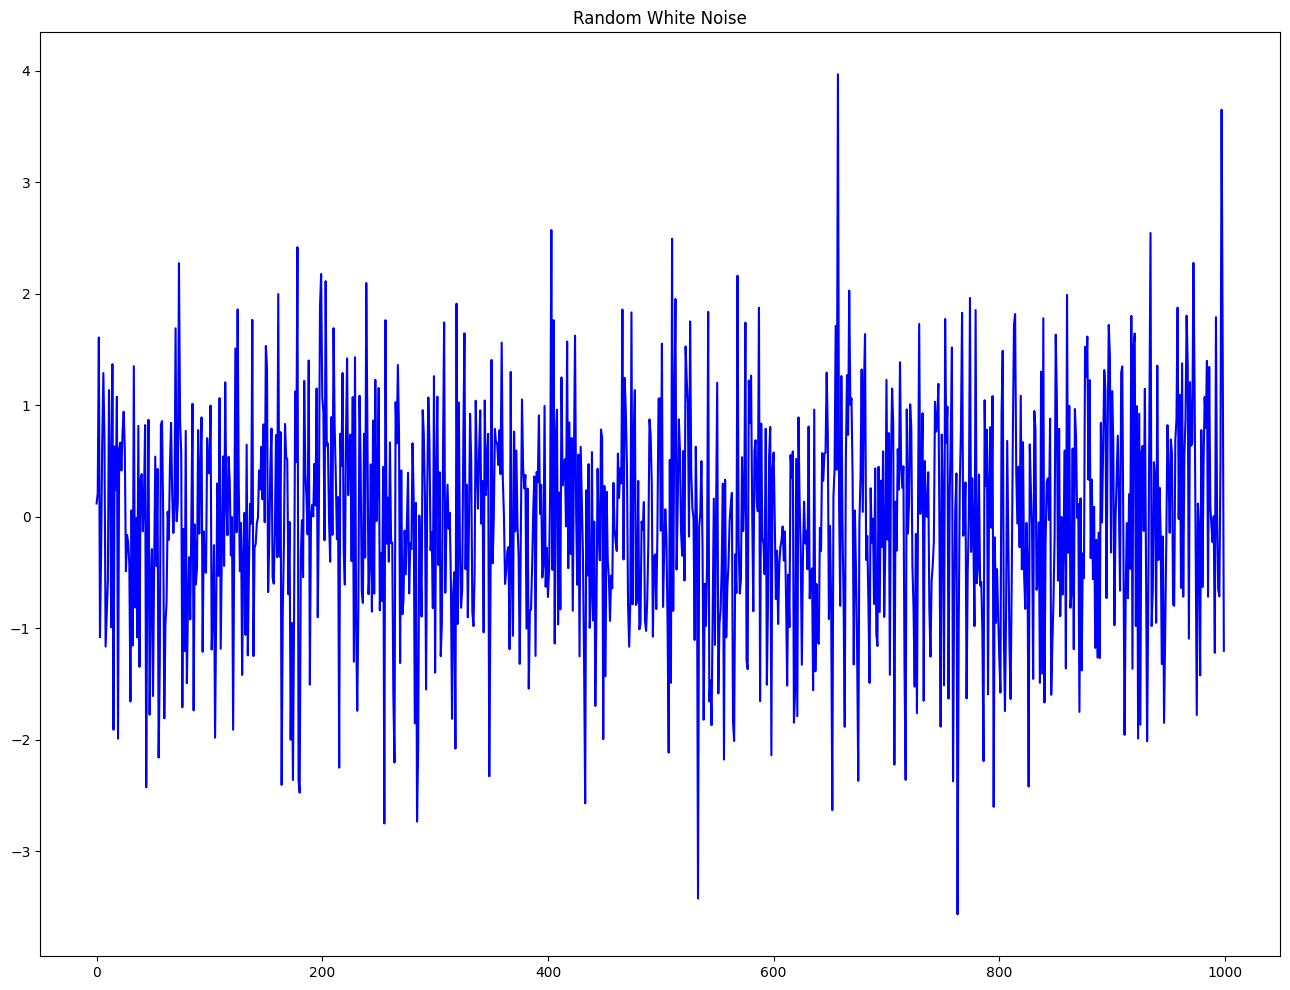

In [12]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

# **13. Detrend a Time Series** <a class="anchor" id="13"></a>


[Table of Contents](#0.1)

- Detrending a time series involves removing the trend component from the data. There are several approaches to achieve this, including the following:

1. `Subtracting the line of best fit`: This method involves fitting a linear regression model using the time steps as predictors and subtracting the predicted values from the original series. For more complex trends, quadratic terms (x^2) can be included in the model.

2. `Subtracting the trend component from time series decomposition`: Time series decomposition breaks down a series into its individual components, including the trend. By subtracting the trend component, we can obtain a detrended series.

3. `Subtracting the mean`: This method involves subtracting the mean value of the series from each observation, effectively removing the average trend.

4. `Applying a filter`: Filters such as the Baxter-King filter or the Hodrick-Prescott Filter can be used to remove moving average trend lines or cyclical components from the series.

In the following code, we will demonstrate the implementation of the first two methods to detrend a time series.

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

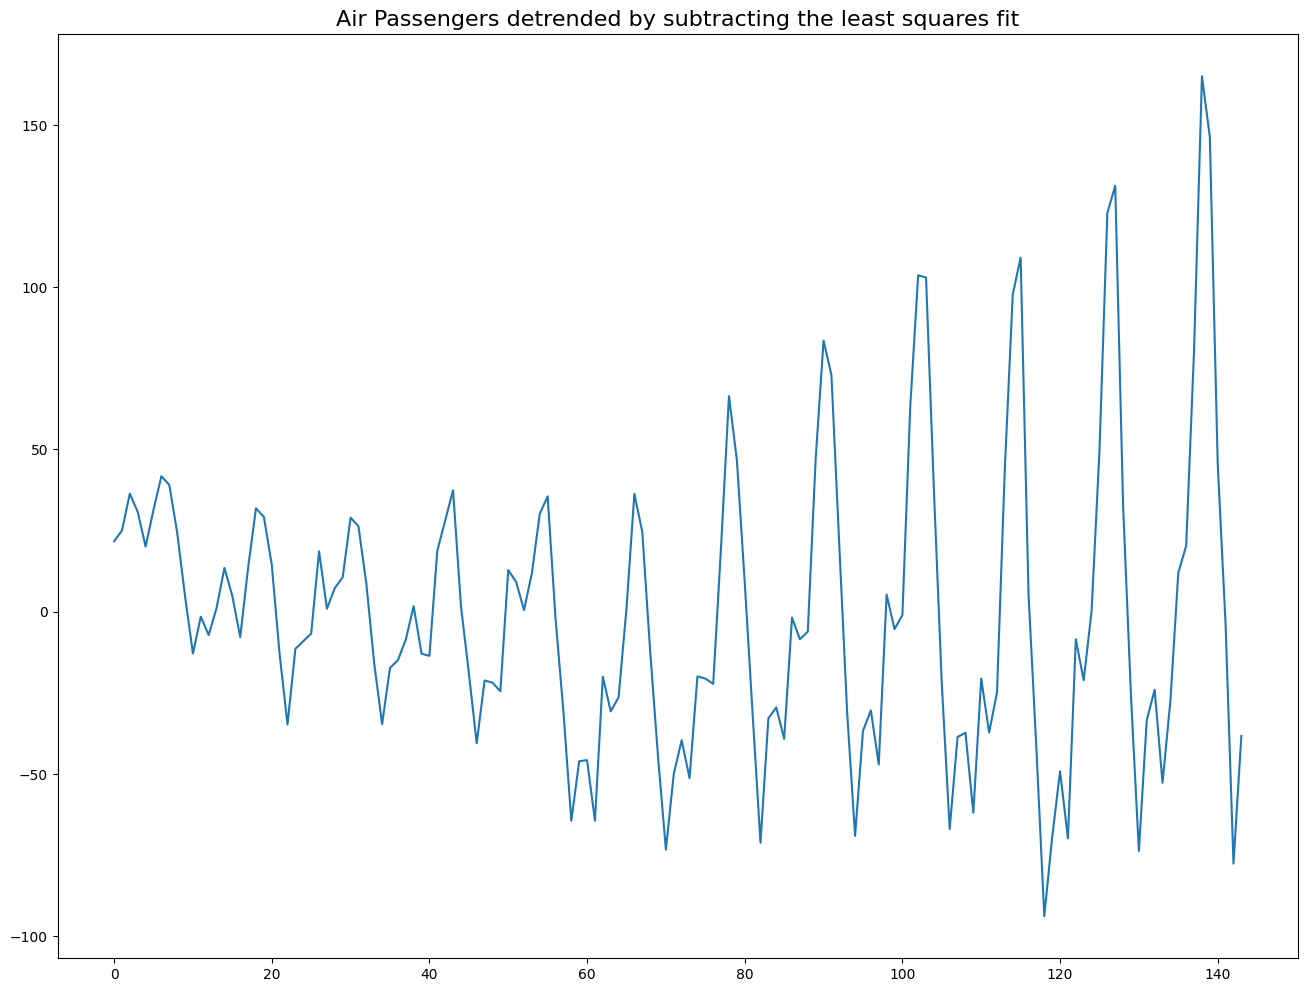

In [13]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

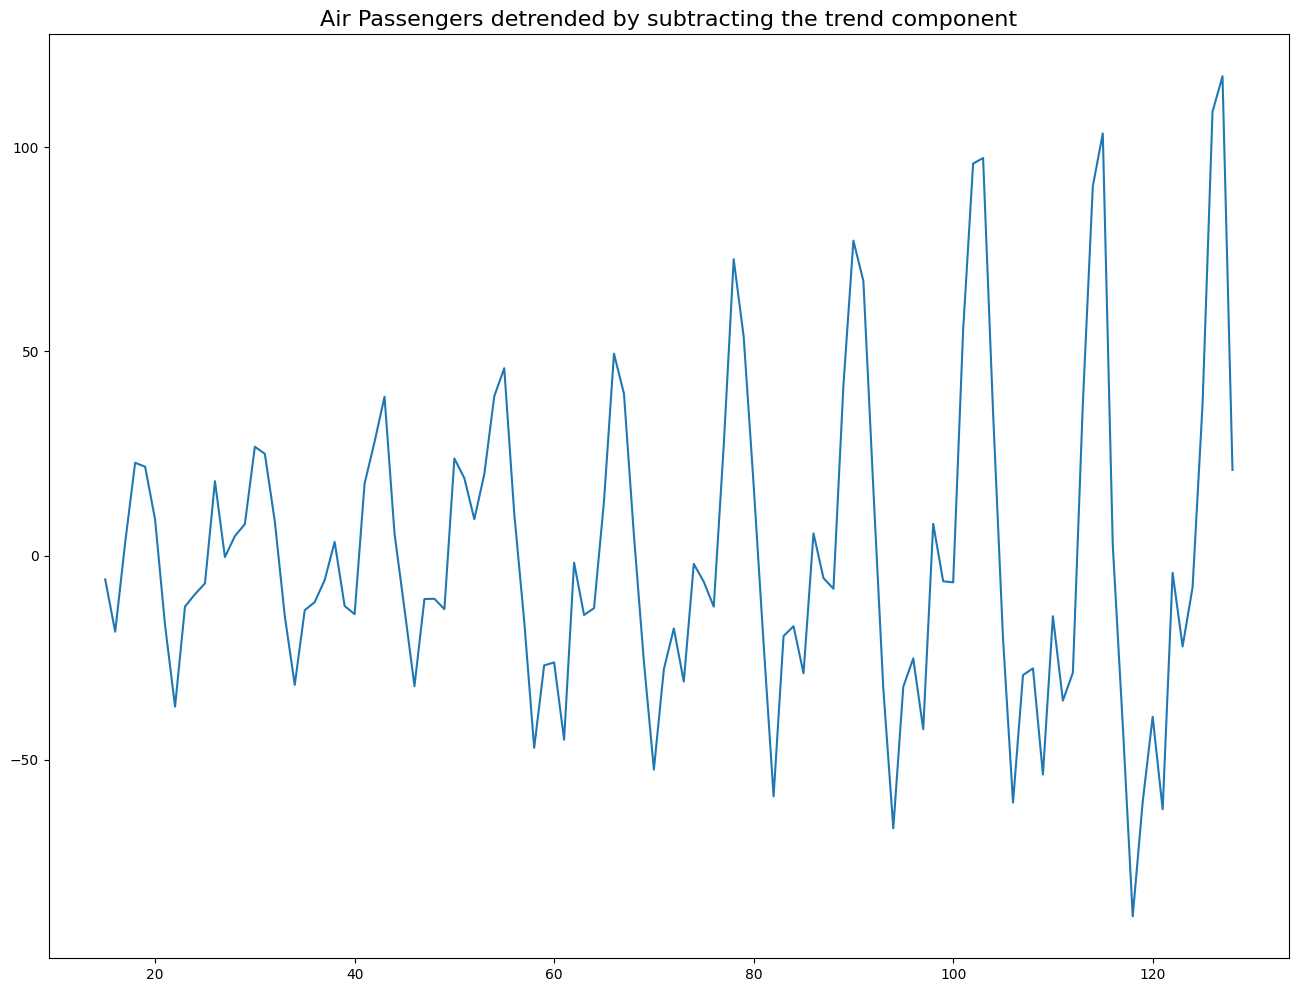

In [14]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

# **14. Deseasonalize a Time Series** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)

There are several approaches to deseasonalize a time series. These approaches are as follows:

1. `Moving average`: Take a moving average with a window length equal to the seasonal period. This helps to smooth out the series and remove the seasonal component.

2. `Seasonal differencing`: Subtract the value of the previous season from the current value. This helps in removing the seasonal pattern from the series.

3. `Divide by seasonal index`: Obtain the seasonal index using methods like STL decomposition, and divide the series by the corresponding seasonal index values. This adjusts the series for seasonality.

If dividing by the seasonal index does not provide satisfactory results, an alternative approach is to take the logarithm of the series and perform deseasonalization on the transformed data. Later, the series can be restored to the original scale by taking an exponential function.

In the following code, we will demonstrate the implementation of these deseasonalization methods.

[]

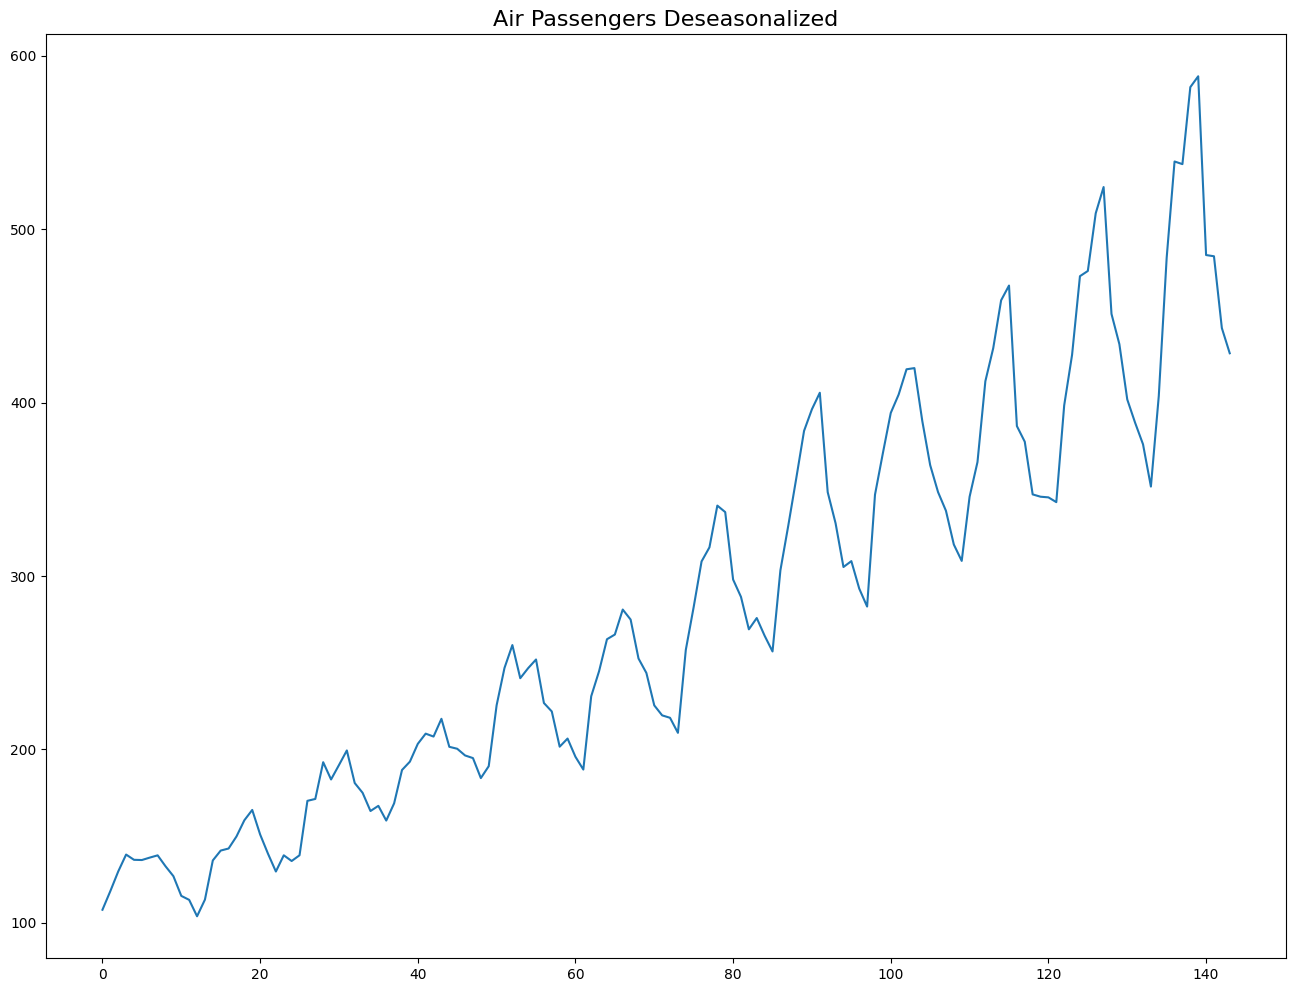

In [15]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

# **15. How to test for seasonality of a time series?** <a class="anchor" id="15"></a>


[Table of Contents](#0.1)

To test for seasonality in a time series, a common approach is to visually inspect the series and look for repetitive patterns within fixed time intervals. The seasonality types can be determined based on the clock or the calendar, such as the hour of the day, day of the month, weekly, monthly, or yearly patterns.

Alternatively, a more definitive examination of seasonality can be performed using the `Autocorrelation Function (ACF)` plot. In the ACF plot, if there is a strong seasonal pattern present, it typically exhibits repeated spikes at multiples of the seasonal window. This allows for a more precise identification of the seasonality in the time series.

In the following code, we will demonstrate how to visually inspect the series for seasonality and generate the ACF plot to detect any significant seasonal patterns..

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

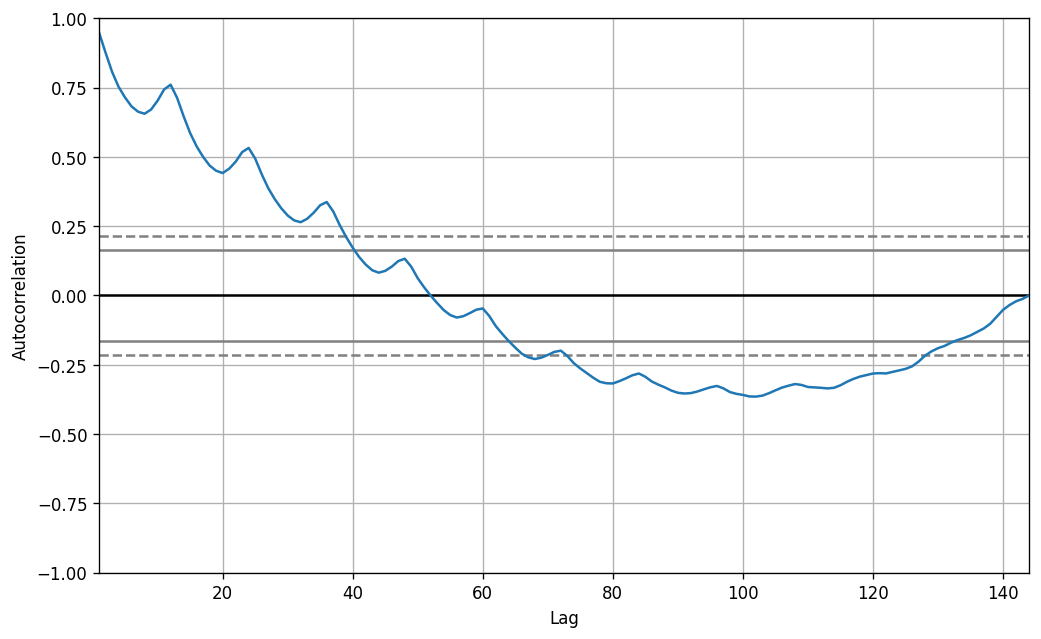

In [16]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

Alternately, if we want a statistical test, the [CHTest](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest) can determine if seasonal differencing is required to stationarize the series.

# **16. Autocorrelation and Partial Autocorrelation Functions** <a class="anchor" id="16"></a>


[Table of Contents](#0.1)

- `Autocorrelation` is a measure of the correlation between a time series and its own lagged values. If a series exhibits significant autocorrelation, it indicates that past values of the series (lags) can be useful in predicting the current value.

- On the other hand, `partial autocorrelation` provides a measure of the correlation between a time series and its lag, while excluding the correlation contributions from intermediate lags. It focuses on the direct relationship between a specific lag and the current value, disregarding the influence of other lags.

Both `autocorrelation` and `partial autocorrelation` serve as important tools in time series analysis, helping to identify the presence and strength of dependencies between observations at different time points. These insights can guide the selection of appropriate models and aid in forecasting future values based on the historical patterns of the series.


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


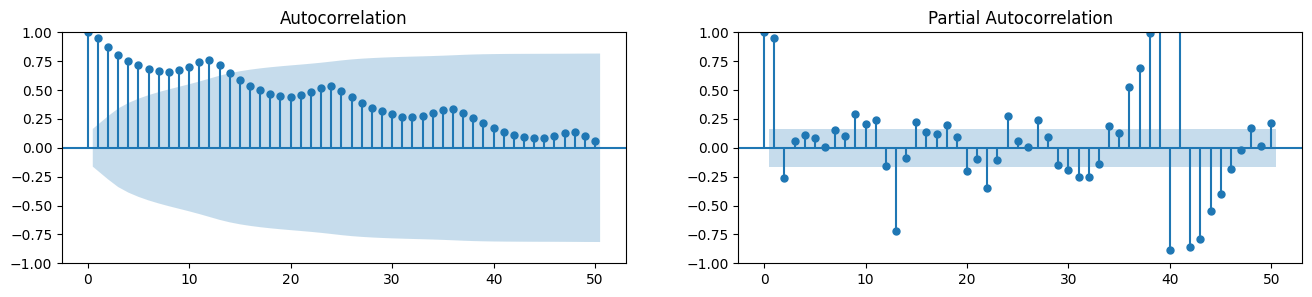

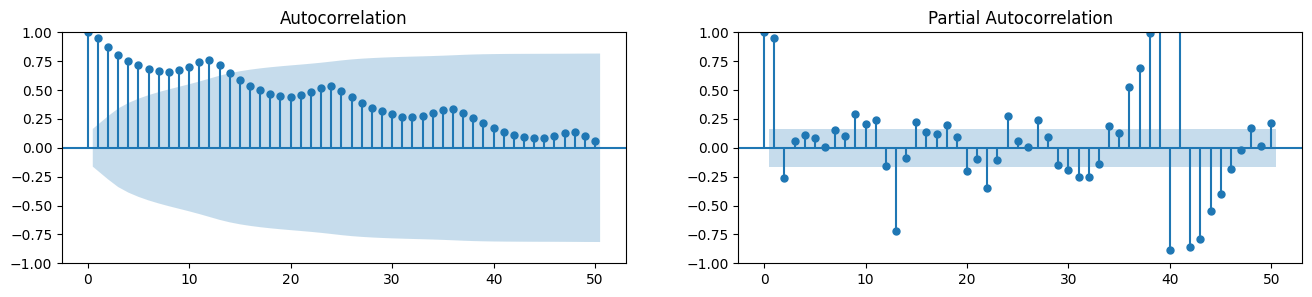

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

# **17. Computation of Partial Autocorrelation Function** <a class="anchor" id="17"></a>


[Table of Contents](#0.1)


- The `partial autocorrelation` function (PACF) of a time series at lag (k) represents the correlation between the series at the current time step and its lagged value at lag k, while accounting for the correlation contributions from intermediate lags. It quantifies the direct relationship between a specific lag and the current value, excluding the influence of other lags.

- In practical terms, the PACF at lag k measures the coefficient $\alpha_k$ in the autoregressive equation of the time series. The autoregressive equation is a linear regression model that uses the series' own lagged values as predictors.

For instance, if we have a time series Y_t and want to determine the partial autocorrelation at lag 3 (Y_t-3), we estimate the coefficient $\alpha_3$ in the equation:

![Partial Autocorrelation Function](https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1

# **18. Lag Plots** <a class="anchor" id="18"></a>


[Table of Contents](#0.1)


- A **Lag plot** is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.


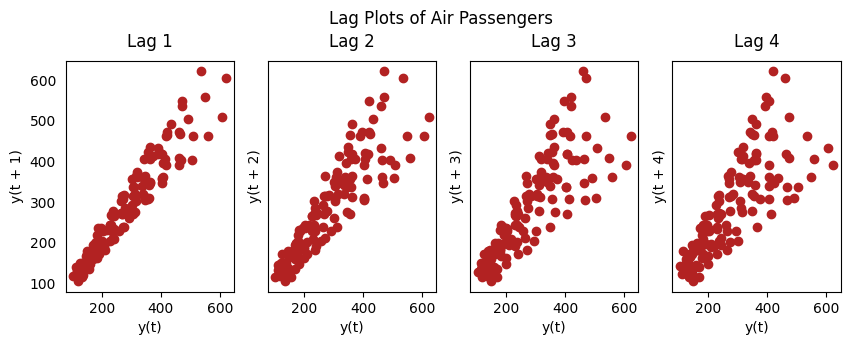

In [18]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

# **19. Granger Causality Test** <a class="anchor" id="19"></a>


[Table of Contents](#0.1)


- The **Granger causality test** is a statistical test used to determine if one time series can be useful in forecasting another time series. It is based on the concept that if variable X causes variable Y, then incorporating the past values of both X and Y should yield better forecasts for Y compared to using only the past values of Y.

- It is important to note that the Granger causality test is not suitable for testing if a lag of Y causes Y itself. Instead, it is typically applied to examine the causal relationship between Y and exogenous variables (not lagged values of Y). The test is implemented in the statsmodels package, which requires a 2D array with two columns as input. The values of the time series are placed in the first column, while the predictor variable (X) is placed in the second column.

- The null hypothesis of the Granger causality test states that the series in the second column does not Granger cause the series in the first column. If the resulting p-values are below a significance level (e.g., 0.05), the null hypothesis is rejected. This implies that the lagged values of X are indeed useful in predicting the series in the first column. The second argument, maxlag, determines the maximum number of lags of Y included in the test.

- By performing the Granger causality test, we can assess the influence and predictive power of one time series on another, aiding in the understanding and modeling of complex relationships in time series data.

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('/content/AirPassengers.csv')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=7.5667  , p=0.0059  , df=1
likelihood ratio test: chi2=7.3733  , p=0.0066  , df=1
parameter F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=10.3154 , p=0.0058  , df=2
likelihood ratio test: chi2=9.9579  , p=0.0069  , df=2
parameter F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2


{1: ({'ssr_ftest': (7.407967762077273, 0.007318844731632552, 140.0, 1),
   'ssr_chi2test': (7.566709928407499, 0.00594562186503604, 1),
   'lrtest': (7.373310381387228, 0.00661989587473731, 1),
   'params_ftest': (7.407967762077268, 0.007318844731632552, 140.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.976083922906452, 0.00819979590267562, 137.0, 2),
   'ssr_chi2test': (10.315385650404616, 0.0057549620839173355, 2),
   'lrtest': (9.95792312585968, 0.006881204546489823, 2),
   'params_ftest': (4.976083922906381, 0.008199795902676155, 137.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

- In the above case, the p-values are zero for all tests. So the ‘month’ indeed can be used to forecast the values.

# **20. Smoothening a Time Series** <a class="anchor" id="20"></a>


[Table of Contents](#0.1)

Smoothing of a time series can be beneficial in various situations:

1. **Reducing noise**: Smoothing helps in reducing the impact of noise present in a signal, providing a clearer representation of the underlying pattern or trend.

2. **Feature extraction**: The smoothed version of a series can serve as a useful feature to explain and understand the original series. It captures the general behavior and removes unnecessary fluctuations.

3. **Improved visualization**: Smoothing aids in visualizing the underlying trend or pattern in the time series data, making it easier to interpret and analyze.

To achieve smoothing, we can employ the following methods:

1. **Moving average**: This method involves calculating the average of a specified window of values and assigning it to the central point. It effectively reduces short-term fluctuations and emphasizes the overall trend.

2. **LOESS smoothing (Localized Regression)**: LOESS smoothing fits a regression model to localized subsets of the data, giving higher weightage to nearby points. It allows for capturing non-linear trends and is particularly useful when dealing with complex or irregular patterns.

3. **LOWESS smoothing (Locally Weighted Regression)**: Similar to LOESS, LOWESS also uses localized regression, but it assigns weights to the data points based on their proximity. This approach provides flexibility in handling outliers and preserves the structure of the data.

By applying these smoothing techniques, we can enhance data interpretation, noise reduction, and feature extraction in time series analysis.

# **21. References** <a class="anchor" id="21"></a>

[Table of Contents](#0.1)

The concepts and code in this notebook is taken from the following websites:-

1.	https://www.machinelearningplus.com/time-series/time-series-analysis-python/
2.	https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
3.	https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
4.	https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3



So, now we will come to the end of this notebook.

I hope you find this notebook useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)